In [9]:
import numpy as np
import xml
import matplotlib.pyplot as plt
points = "40.34214 3.5625 -219.1813 -60.08951 3.5625 -219.1813 40.34214 3.5625 -202.3688 -60.08951 3.5625 -202.3688 -71.15786 3.5625 -213.4372 -71.15786 3.5625 -219.1813 -60.08951 3.5625 -249.9313 -71.08951 3.5625 -249.9313 -71.08951 3.5625 -219.1813"
points = points.split()
points = np.array(list(map(float, points))).\
    reshape(len(points)//3, 3)

idx = "1 0 0 2 2 3 3 4 4 5 6 1 7 6 8 7"
idx = idx.split()
idx = np.array(list(map(int, idx))).reshape(len(idx)//2, 2)

xs =0.0254 * points[idx, 0].T
zs =0.0254* points[idx, 2].T

points = "-212.999 4.6875 156.2939 -196.991 4.6875 159.6128 -227.6025 4.6875 148.9449 -239.8063 4.6875 138.0667 -248.7788 4.6875 124.4005 -253.9086 4.6875 108.8777 -254.8459 4.6875 92.5562 -251.527 4.6875 76.54823 -244.178 4.6875 61.94471 -233.2997 4.6875 49.74086 -219.6335 4.6875 40.76835 -204.1108 4.6875 35.63863 -187.7893 4.6875 34.7013 -171.7813 4.6875 38.02022 -157.1778 4.6875 45.36922 -144.9739 4.6875 56.24747 -136.0014 4.6875 69.91365 -130.8717 4.6875 85.43642 -129.9344 4.6875 101.7579 -133.2533 4.6875 117.7659 -140.6023 4.6875 132.3694 -151.4805 4.6875 144.5733 -165.1467 4.6875 153.5458 -180.6695 4.6875 158.6755"
points = points.split()
points = np.array(list(map(float, points))).\
    reshape(len(points)//3, 3)

idx = "1 0 0 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 1"
idx = idx.split()
idx = np.array(list(map(int, idx))).reshape(len(idx)//2, 2)

xs =0.0254 * points[idx, 0].T
zs =0.0254* points[idx, 2].T

points = ""
points = points.split()
points = np.array(list(map(float, points))).\
    reshape(len(points)//3, 3)

idx = "1 0 0 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 1"
idx = idx.split()
idx = np.array(list(map(int, idx))).reshape(len(idx)//2, 2)

xs =0.0254 * points[idx, 0].T
zs =0.0254* points[idx, 2].T

def collide(x, z, vx, vz, ignore = -1):
    np.seterr(divide="ignore")
    vx = -vx
    vz = -vz
    trans_xs = xs - x
    trans_zs = zs - z
    x1 = trans_xs[0]
    x2 = trans_xs[1]
    z1 = trans_zs[0]
    z2 = trans_zs[1]
    
    denom = ((x1 - x2) * vz - (z1 - z2) * vx)
    
    t = ((-x2 * vz - -z2 * vx)) / denom
    a = ((x1 - x2) * -z2  - (z1 - z2) * - x2) / denom
    #print (t)
    #print(a)
    
    a [np.logical_not (np.logical_and(t > 0.001, np.logical_and(t < 1, a > 0)))] = 99
    if ignore != -1:
        a[ignore] = 99
    return np.argmin(a), np.min(a)

def reflect(vx, vz, n):
    #maths
    nz = xs[1][n] - xs[0][n]
    nx = -zs[1][n] + zs[0][n]
    
    mul = 1.8 * (nx * vx + nz * vz) / (nx * nx + nz * nz)
    
    return vx - mul * nx, vz - mul * nz

slow = .01
timestep = .01
def path(x,z, vx, vz):
    
    while vx * vx + vz * vz > slow * slow:
        n, tiem = collide(x, z, vx, vz)
        if tiem < timestep:
            timeleft = timestep
            while tiem < timeleft:
                x += vx * tiem
                z += vz * tiem
                vx, vz = reflect(vx, vz, n)
                n, tiem = collide(x, z, vx, vz, n)
                
            x += vx * (timeleft)
            z += vz * (timeleft)
        else:
            x += vx * timestep
            z += vz * timestep
            
        l = np.sqrt(vx * vx + vz * vz)
        vx -= slow * vx/l
        vz -= slow * vz/l
        
        yield x, z

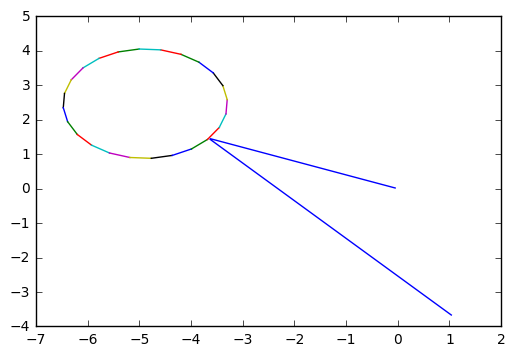

In [10]:
patsh= np.array(list(path(0, 0, -5, 2.0)))
plt.plot(patsh[:, 0], patsh[:, 1])
plt.plot(xs, zs)
plt.show()

In [16]:

for i in range(i):
    pass
i

5

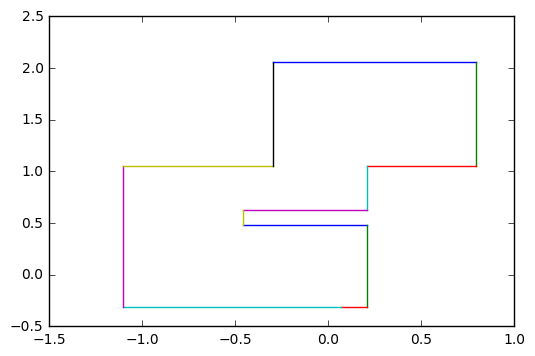

In [15]:
plt.plot(xs, zs)
plt.show()

In [165]:

    
    
n, t  = collide(0, 0, 1, 1)

reflect(1, 1, n)

(-0.80000000000000004, 1.0)

In [166]:
for _ in range(1000):
    collide(0, 0, .714, .714)

In [17]:
i=path(0, 0, -5, 2.0)

In [19]:
next(i)

(-0.05, 0.02)